In [4]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models

import random

import matplotlib.pyplot as plt

In [56]:
class_labels = {
    0: "Airplane",
    1: "Automobile",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Ship",
    9: "Truck"
}

In [30]:
weights_1i = torch.load('model_1_initial.pth')
weights_15 = torch.load('model_1_epoch_5.pth')
weights_110 = torch.load('model_1_epoch_10.pth')
weights_2i = torch.load('model_2_initial.pth')
weights_25 = torch.load('model_2_epoch_5.pth')
weights_210 = torch.load('model_2_epoch_10.pth')

In [20]:
weights.keys()

odict_keys(['features.0.weight', 'features.0.bias', 'features.2.weight', 'features.2.bias', 'features.5.weight', 'features.5.bias', 'features.7.weight', 'features.7.bias', 'features.10.weight', 'features.10.bias', 'features.12.weight', 'features.12.bias', 'features.14.weight', 'features.14.bias', 'features.17.weight', 'features.17.bias', 'features.19.weight', 'features.19.bias', 'features.21.weight', 'features.21.bias', 'features.24.weight', 'features.24.bias', 'features.26.weight', 'features.26.bias', 'features.28.weight', 'features.28.bias', 'classifier.0.weight', 'classifier.0.bias', 'classifier.3.weight', 'classifier.3.bias', 'classifier.6.weight', 'classifier.6.bias'])

In [71]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 이미지 크기를 VGGNet의 입력 크기로 변경
    transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [72]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [73]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

tensor([5, 6, 5, 6, 5, 4, 1, 1, 4, 6, 6, 7, 1, 8, 1, 3, 1, 0, 8, 2, 3, 7, 5, 2,
        1, 5, 6, 3, 8, 7, 5, 1, 5, 2, 3, 4, 4, 7, 9, 3, 3, 3, 6, 0, 3, 9, 1, 8,
        9, 1, 1, 1, 6, 9, 3, 8, 0, 1, 0, 7, 8, 2, 0, 9])


In [139]:
image = images[22]
label = labels[22]
print(labels)

tensor([5, 6, 5, 6, 5, 4, 1, 1, 4, 6, 6, 7, 1, 8, 1, 3, 1, 0, 8, 2, 3, 7, 5, 2,
        1, 5, 6, 3, 8, 7, 5, 1, 5, 2, 3, 4, 4, 7, 9, 3, 3, 3, 6, 0, 3, 9, 1, 8,
        9, 1, 1, 1, 6, 9, 3, 8, 0, 1, 0, 7, 8, 2, 0, 9])


In [140]:
image.shape

torch.Size([3, 224, 224])

In [141]:
image = image.to('cuda')

In [110]:
# 이미지를 넘파이 배열로 변환 (텐서를 넘파이로 변환하여 시각화에 사용)
image_np = image.numpy()

# 이미지 시각화
plt.figure(figsize = (5,5))
plt.imshow(np.transpose(image_np, (1, 2, 0)))
plt.title(class_labels[label.item()])
plt.show()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [128]:
vgg16 = models.vgg16(pretrained=False)
vgg16.classifier[6] = nn.Linear(4096, 10)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg16.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [129]:
vgg16.load_state_dict(weights_110)
vgg16.eval()  

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [143]:
# 이미지를 VGG-16 합성곱 레이어들을 통과시키기
conv_feature_maps = []
for layer in vgg16.features:
    image = layer(image)
    if isinstance(layer, torch.nn.modules.conv.Conv2d):
        conv_feature_maps.append(image)
        
# 각 레이어의 출력 크기와 채널 수 출력
for i, feature_map in enumerate(conv_feature_maps):
    print(f"Layer {i+1}: Size = {feature_map.size()}, Channels = {feature_map.size(1)}")

Layer 1: Size = torch.Size([64, 224, 224]), Channels = 224
Layer 2: Size = torch.Size([64, 224, 224]), Channels = 224
Layer 3: Size = torch.Size([128, 112, 112]), Channels = 112
Layer 4: Size = torch.Size([128, 112, 112]), Channels = 112
Layer 5: Size = torch.Size([256, 56, 56]), Channels = 56
Layer 6: Size = torch.Size([256, 56, 56]), Channels = 56
Layer 7: Size = torch.Size([256, 56, 56]), Channels = 56
Layer 8: Size = torch.Size([512, 28, 28]), Channels = 28
Layer 9: Size = torch.Size([512, 28, 28]), Channels = 28
Layer 10: Size = torch.Size([512, 28, 28]), Channels = 28
Layer 11: Size = torch.Size([512, 14, 14]), Channels = 14
Layer 12: Size = torch.Size([512, 14, 14]), Channels = 14
Layer 13: Size = torch.Size([512, 14, 14]), Channels = 14


In [148]:
conv_feature_maps[12].shape

torch.Size([512, 14, 14])

In [156]:
conv_feature_maps[12][0].cpu().detach().numpy().transpose((1, 0)

SyntaxError: incomplete input (3636669363.py, line 1)

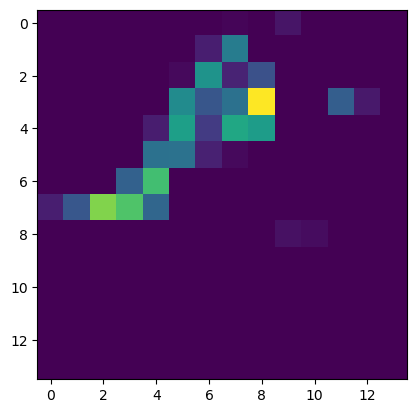

In [163]:
plt.imshow(conv_feature_maps[12][6].cpu().detach().numpy().transpose((1, 0)), cmap='viridis')